In [51]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
plt.style.use('default')

In [70]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)

list_of_catigories = ['Exited','IsActiveMember','HasCrCard','NumOfProducts']
for col in list_of_catigories:
    churn_data[col].astype('category')

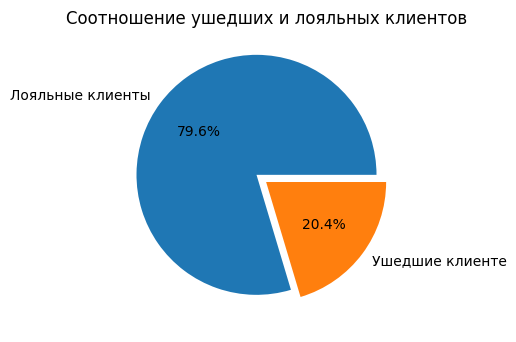

In [54]:
exited_count = churn_data.value_counts('Exited')
exited_count

fig = plt.figure(figsize = (3,3))
axes = fig.add_axes ([0,0,1,1])
axes.pie(
    exited_count,
    labels = ['Лояльные клиенты','Ушедшие клиенте'],
    autopct='%.1f%%',
    explode = [0.1,0]
)

axes.set_title('Соотношение ушедших и лояльных клиентов');

Соотношени ушедших и лояльных клиентов говорит о том, что на данный момент ушел каждый пятый клиент банка. Можно предположить что удержание находится в районе 80% но что бы это проверить, нужно смотреть динамику во времени. А чтобы сделать выводы по этому значению удержания клиентов необходимо сравнивать эту статистику с другими банками. 

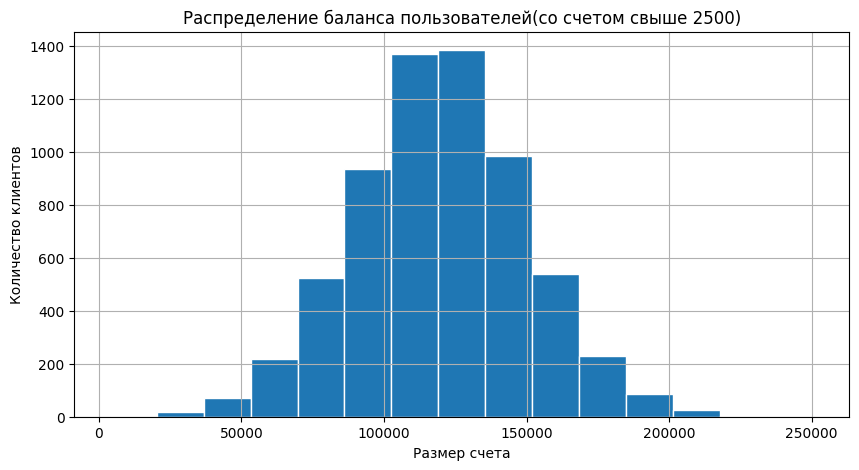

In [55]:
mask = churn_data['Balance'] > 2500
churn_data_hist = churn_data[mask]['Balance']

fig, axes = plt.subplots(figsize=(10, 5))
axes.hist(
    churn_data_hist,
    bins=15,
    edgecolor="white"
)

axes.set_title('Распределение баланса пользователей(со счетом свыше 2500)')
axes.set_xlabel('Размер счета')
axes.set_ylabel('Количество клиентов')
axes.grid();

Больше всего клиентов с счетами свыше 2500 долларов распологают счетами от 10000 до 13000 долларов.По мере увеличения размера счета, количество клиентов с таким балансом постепенно увеличивается и постепенно снижается в соостветсвии с нормальным распределением. 

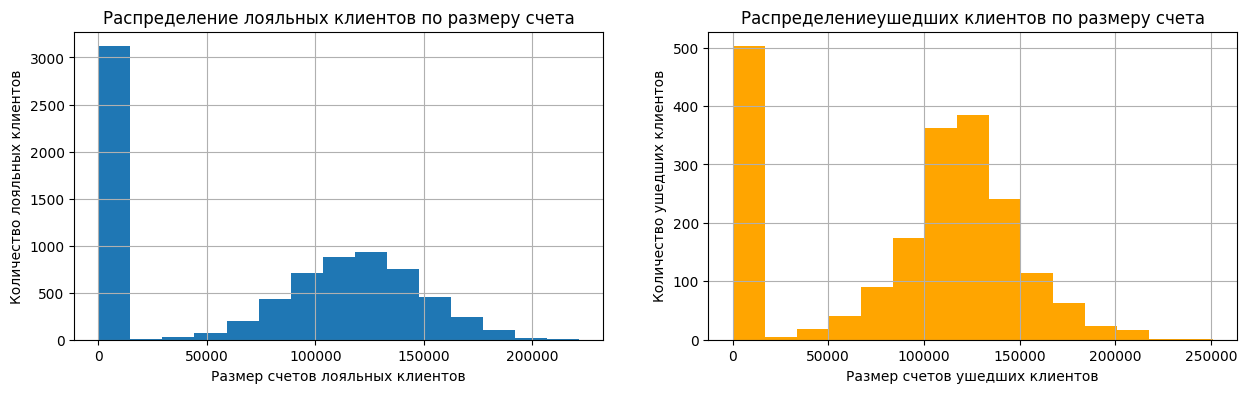

In [56]:
exited_hist_0 = churn_data[churn_data['Exited'] == 0]
exited_hist_1 = churn_data[churn_data['Exited'] == 1]

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
axes[0].hist(exited_hist_0['Balance'], bins=15)
axes[1].hist(exited_hist_1['Balance'], bins=15, color='orange');

axes[0].set_title('Распределение лояльных клиентов по размеру счета');
axes[1].set_title('Распределениеушедших клиентов по размеру счета');
axes[0].set_xlabel('Размер счетов лояльных клиентов');
axes[1].set_xlabel('Размер счетов ушедших клиентов');
axes[0].set_ylabel('Количество лояльных клиентов');
axes[1].set_ylabel('Количество ушедших клиентов');
axes[0].grid()
axes[1].grid()



Из банка чаще уходят среднестатистические клиенты банка с размером счета от 10000 до 13000 долларов. График лояльных клиентов не имеют ярко выраженного пика, как это происходит на графике ушедших клиентов. 

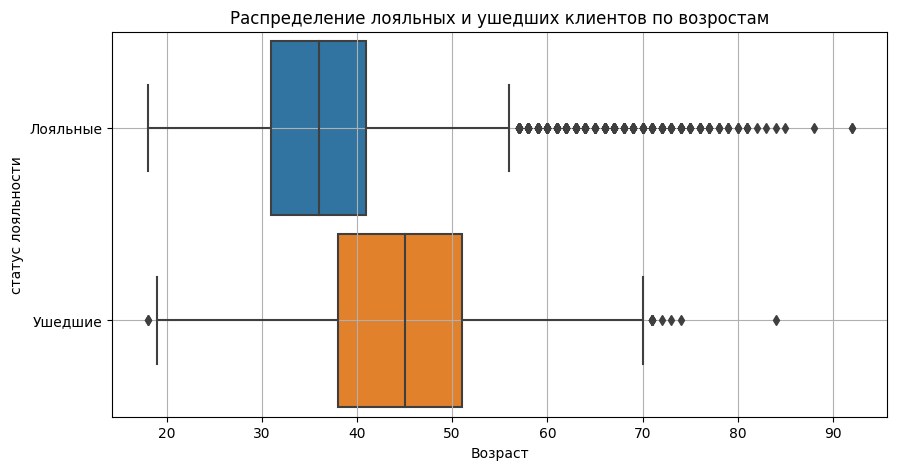

In [69]:
fig = plt.figure(figsize=(10, 5))

labels = ['Лояльные','Ушедшие']
x = np.arange(len(labels))

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    
)
boxplot.set_title('Распределение лояльных и ушедших клиентов по возростам');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('статус лояльности');
boxplot.grid()
boxplot.set_yticks(x,labels);

Большинство лояльных клиентов существенно моложе ушедших. Больше всего лояльных клиентов в возросте от 31 до 41. Начиная с возроста 38 лет, клиенты начинают уходить. Лояльных клиентов старше 56 почти нет. Возростная категория с 38 и до 51 года требует больше всего внимания. Среди лояльных клиентов старше 55 лет чаще всего встречаются выбросы.

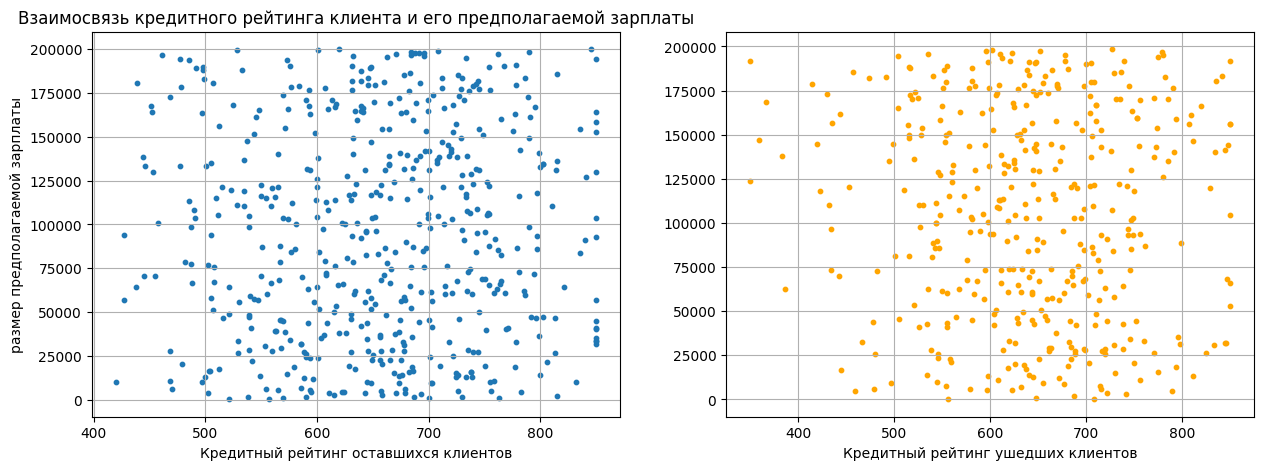

In [58]:
exited_hist_0 = churn_data[churn_data['Exited'] == 0]
exited_hist_1 = churn_data[churn_data['Exited'] == 1]
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

ax[0].scatter(exited_hist_0['CreditScore'][::15], exited_hist_0['EstimatedSalary'][::15],s=10)
ax[1].scatter(exited_hist_1['CreditScore'][::5], exited_hist_1['EstimatedSalary'][::5],s=10,c='orange');

ax[0].set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');
ax[0].set_xlabel('Кредитный рейтинг оставшихся клиентов');
ax[1].set_xlabel('Кредитный рейтинг ушедших клиентов');
ax[0].set_ylabel('размер предполагаемой зарплаты');
ax[0].grid()
ax[1].grid()


С приблизительно одинаковым кредитным рейтингом встречаются люди с совершенно различными уровнями зароботной платы, что говорит об отсутсвии взаимосвязи между кредитным рейтингом и зароботной платой.  

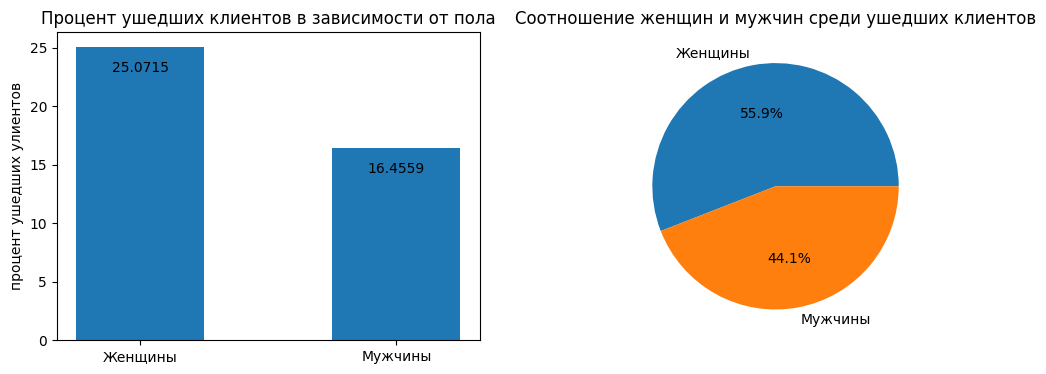

In [59]:
mask = churn_data['Exited'] == 1
churn_data_pie = churn_data[mask]['Gender'].value_counts()

churn_data_bar = churn_data.groupby('Gender')['Exited'].mean()*100
labels = ['Женщины','Мужчины']

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

a = axes[0].bar(
    x = churn_data_bar.index,
    height = churn_data_bar,
    width=0.5,
)

axes[0].set_ylabel('процент ушедших улиентов')
axes[0].set_title('Процент ушедших клиентов в зависимости от пола');
axes[0].set_xticks(x,labels);
axes[0].bar_label(a,padding=-20)

axes[1].pie(
    churn_data_pie,
    labels = ['Женщины','Мужчины'],
    autopct='%.1f%%',
    explode = [0,0]
)

axes[1].set_title('Соотношение женщин и мужчин среди ушедших клиентов');


Чаще всего ушедшими клиенами становятся женщины. Они уходят чаще на 8,6156%. Среди всех ушедших клиентов женщин на 11.8% больше. 

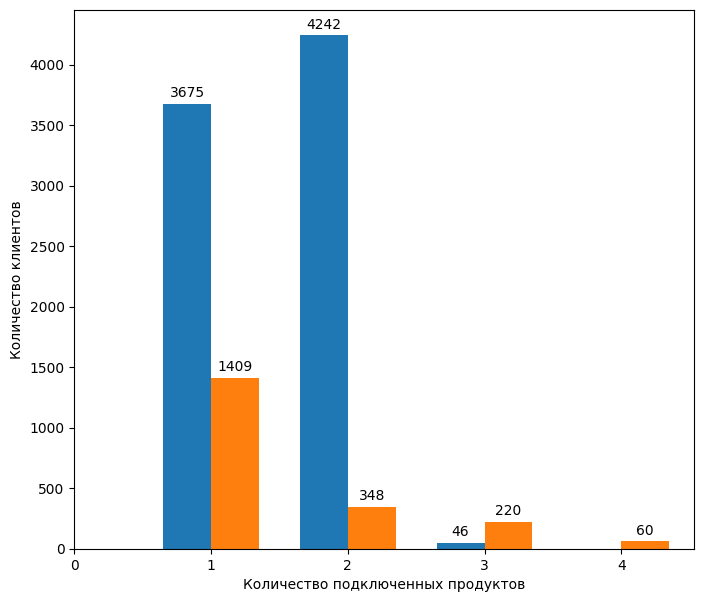

In [60]:
mask0 = churn_data['Exited'] == 0
mask1 = churn_data['Exited'] == 1
churn_data_bar0 = churn_data[mask0].groupby('NumOfProducts')['Exited'].count()
churn_data_bar1 = churn_data[mask1].groupby('NumOfProducts')['Exited'].count()

width = 0.35
labels = ['0','1','2','3','4']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 7))
rects1 = ax.bar(x = churn_data_bar0.index - width/2, height = churn_data_bar0,  width=width)
rects2 = ax.bar(x = churn_data_bar1.index + width/2,  height = churn_data_bar1, width=width)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xlabel('Количество подключенных продуктов')
ax.set_ylabel('Количество клиентов')
ax.set_xticks (x ,labels);

Основное число клиентов используют не более 2 банковских продуктов. Количество клиентов, использующих больше 2 продуктов почти в 19.5 раза меньше. 

При этом количество ушедших клиентов относительно лояльных резко возростает при использовании больше 2 банковских продуктов. Так среди клиентов, использующих 3 продукта количество ушедщих клиентов почти в 4 раза больше. А среди тех, кто использовал 4 продукта лояльных почти нет. 

Есть вероятность что основные банковские продукты в достаточной степени устраивают клиентов. Но вот дополнительные или не могут их заинтересовать или не устраивают при использовании. И если человеку нужны более редкие банковские продукты, он просто ищет предложение в другом банке.

Более точно понять причину такого распределения можно только при наличии данных об использованных продуктах. 

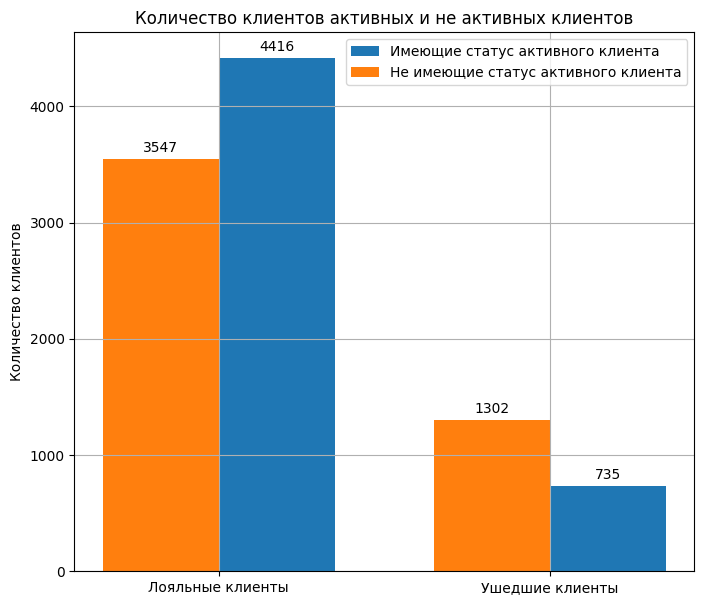

In [61]:
mask0 = churn_data['IsActiveMember'] == 0
mask1 = churn_data['IsActiveMember'] == 1
width = 0.35

labels = ['Лояльные клиенты','Ушедшие клиенты']
x = np.arange(len(labels))
churn_data_bar_1 = churn_data[mask1].groupby('Exited')['IsActiveMember'].count()
churn_data_bar_0 = churn_data[mask0].groupby('Exited')['IsActiveMember'].count()


fig, ax = plt.subplots(figsize=(8, 7))
rects2 = ax.bar(x + width/2, height=churn_data_bar_1,width=width,label='Имеющие статус активного клиента')
rects1 = ax.bar(x - width/2, height=churn_data_bar_0,width=width, label='Не имеющие статус активного клиента')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3);
ax.set_xticks (x , labels)
ax.set_ylabel('Количество клиентов')
ax.legend()
ax.set_title('Количество клиентов активных и не активных клиентов')
ax.grid()

Статус активного клиента значительно влияет на его удержание. Так среди ушедших клиентов, клиентов без статуса активного клиента на 77% больше. Среди лояльных клиентов, клиентов с статусом активного клиента на 24.5 % больше.

In [62]:
mask0 = churn_data['IsActiveMember'] == 0
churn_data_chor = pd.DataFrame(churn_data[mask0].groupby('Geography')['Exited'].count())
churn_data_chor['Share'] = round(churn_data_chor['Exited']/churn_data_chor['Exited'].sum() *100,2)

#строим график
fig = px.choropleth(
    data_frame=churn_data_chor, #DataFrame
    locations=churn_data_chor.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Share', #от чего зависит цвет
    range_color=[0, 50], #диапазон цвета
    title='Доля ушедших клиентов по странам в процентах', #заголовок
    width=500, #ширина
    height=500, #высота
    color_continuous_scale='Oranges', #палитра цветов
    scope='europe',
    
)

fig.show()

#отображаем график

Самая большая доля ушедших клиентов - это клиенты из Франции. Ушедших клиентов из этой страны почти столько же, сколько из Испании и Германии.Но это легко объясняется тем, что клиентов из Франции приблизительно в два раза больше чем в Германии или Испании. Если учитывать пропоорции клиентов в разных странах, то отношение доли ушедших клиентов к доли всех клиентов по странам практически не меняется:

In [63]:
mask0 = churn_data['IsActiveMember'] == 0
churn_data_chor1 = pd.DataFrame(churn_data[mask0].groupby('Geography')['Exited'].count())
churn_data_chor1['Share'] = churn_data_chor1['Exited']/churn_data_chor1['Exited'].sum() * 100

churn_data_chor2 = pd.DataFrame(churn_data.groupby('Geography')['CustomerId'].count())
churn_data_chor2['Share'] = churn_data_chor2['CustomerId']/churn_data_chor2['CustomerId'].sum() *100

ratio =pd.DataFrame(round(churn_data_chor1['Share']/churn_data_chor2['Share'],2))


fig = px.choropleth(
    data_frame=ratio, #DataFrame
    locations=ratio.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Share', #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Отношение доли ушедших клиентов к доли всех клиентов по странам', #заголовок
    width=700, #ширина
    height=500, #высота
    color_continuous_scale='blues', #палитра цветов
    scope='europe',
    
)

fig.show()

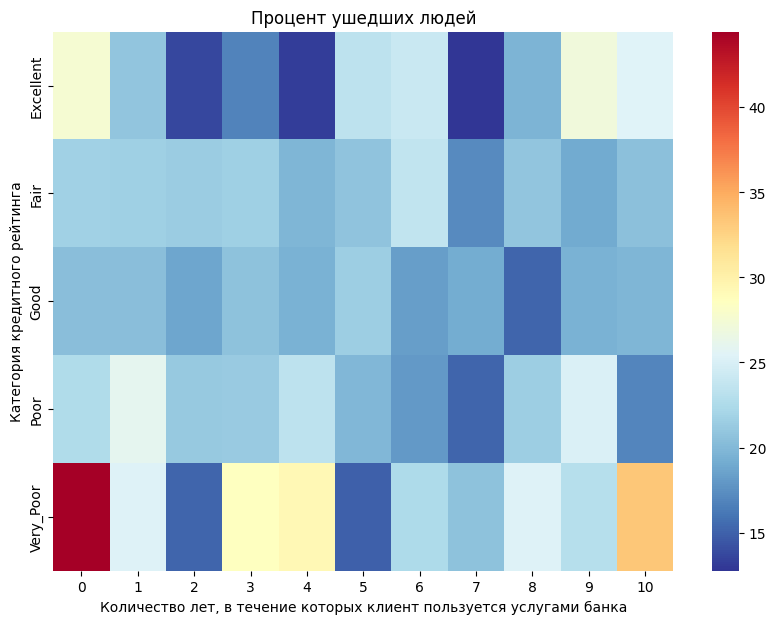

In [64]:
from unicodedata import category


def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['Credit score category'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')

churn_data_pivot = churn_data.pivot_table(
    values='Exited',
    index='Credit score category',
    columns='Tenure'
)*100
fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(data= churn_data_pivot, cmap='RdYlBu_r')
heatmap.set_ylabel('Категория кредитного рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка')
heatmap.set_title('Процент ушедших людей');

Категория людей, которые чаще всего теряют лояльность - это люди с очень низким кредитным рейтингом, особенно с длительностью пользования услугами банка меньше года. 

Также обращают на себя внимание люди с очень высоким рейтингом, среди которых встречаются как максимально лояльные группы, так и сравнительно часто уходящие из банка. Возможно категория людей с очень высоким кредитным рейтингом чаще получают более выгодные предложения из других банков в первый год использования услуг банка и после закрытия длительного кредита, когда их кредитный рейтинг выростает.